# Part 3: Models and Inference

----

# To TAs/Graders:

### The following below is so important and you could not want to miss.

This notebook contains 6 parts.

- A little cleaning.
- Change some columns to percentage, split data to training, validation, test.
- Create dummy variable
- Logistic Regression, Random Forest, Gradient Boosted Trees.
- Inference
- Cluster

** Because we use grid search to tune our models, **it will need too much time to fitting these 3 models.** You may get stuck into this long time fitting. You could try Logistic Regression, which is relative faster.

So we have saved all the models we already fitted, and the same for all best models. They are saved in `models` directory.

In the fitting process in this code, the models are saved in `temp/models` directory, just for playing. You can also loaded the models we already fitted from `models/lr`, `models/rf`, `models/gbt`, if you want to check all the accuracies.

In the evaluate process, the models are loaded from `models/best_models`, which could save you much time.

** So, you may skip the fitting process, directly run the evaluate process for different model types.

It's like:

> lr_best_model = PipelineModel.load("models/best_models/lr_best_model")

> evaluator.evaluate(lr_best_model.transform(testing_df))

** Because it loads models we already trained, **the performance may have some difference.**

The Inference and cluster process is fast, it is suggested to run it.

### Explanation for `temp` directory.

It is like a playground.

No need to worry the important data and models used in other notebook will be re-write, appended, or changed by some running error.

- The **raw data** are saved in `raw_data` directory.

- The **cleaned data** are saved in `data` directory, which will be used by other .ipynb files.

- The **fitted models** are saved in `models` directory.

- The **dataset and models created in this notebook** are saved in `temp/data` directory. Because we assumed you run this code only for checking the code, It is a temp directory, saving temporary data and models.

# 1. Import combined and cleaned data
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### The dataset used in this notebook is data/data_com.csv, which is the cleaned dataset we have already created.

In [2]:
data_path = 'data/data_com.csv'

In [3]:
data = pd.read_csv(data_path, low_memory=False, index_col = 0)

In [4]:
data.head()

,LEAID,SCHLEV,AGCHRT,CONUM,FIPST,YEAR,V33,Re_F_Basic,Re_F_Special,Re_F_Other,...,Ex_Teacher_Inst,Ex_Teacher_Supp,Ex_Employ,Ex_Edu,Ex_Community,Ex_Capital,Ex_Payment,Ex_Textbook,Ex_Interest,AFGR
0,100005,3,3,1095,1,7,3747,2489000,949000,216000,...,11698000,5380000,6763000,29381000,725000,2495000,45000,0,114000,73.0
1,100006,3,3,1095,1,7,5562,4756000,1158000,234000,...,16211000,9568000,10360000,44730000,1453000,952000,6000,0,895000,47.4
2,100007,3,3,1073,1,7,12039,1421000,2047000,169000,...,46371000,25077000,28604000,131719000,3750000,18712000,67000,0,9688000,88.7
3,100008,3,3,1089,1,7,8056,1361000,1620000,47000,...,24774000,10782000,13974000,64516000,1171000,3774000,129000,0,3232000,97.6
4,100011,3,3,1073,1,7,1395,877000,349000,0,...,4321000,2349000,2639000,11786000,78000,2669000,8000,0,195000,61.9


### still need more cleaning...

In [5]:
for a in ['CONUM', 'FIPST', 'V33',
       'Re_F_Basic', 'Re_F_Special', 'Re_F_Other', 'Re_S_Basic',
       'Re_S_Special', 'Re_S_Other', 'Re_L_Gov', 'Re_L_fee', 'Re_L_Other',
       'Ex_Teacher_Inst', 'Ex_Teacher_Supp', 'Ex_Employ', 'Ex_Edu',
       'Ex_Community', 'Ex_Capital', 'Ex_Payment', 'Ex_Textbook',
       'Ex_Interest', 'AFGR']:
    data = data[data[a] >= 0]

In [6]:
#data.info()

In [7]:
# check data using groupby function

In [8]:
#for a in data.columns:
#    l = len(data)
#    print(data.groupby(by=[a])[a].count()/l*100)

LEAID
100005     0.010528
100006     0.010528
100007     0.010528
100008     0.010528
100011     0.010528
100012     0.007896
100013     0.002632
100030     0.010528
100060     0.010528
100090     0.010528
100100     0.010528
100120     0.010528
100180     0.010528
100210     0.010528
100240     0.010528
100270     0.010528
100300     0.010528
100330     0.010528
100360     0.010528
100390     0.010528
100420     0.010528
100450     0.010528
100480     0.010528
100510     0.010528
100540     0.010528
100600     0.010528
100630     0.010528
100660     0.010528
100690     0.010528
100720     0.010528
             ...   
5602870    0.010528
5602990    0.010528
5603170    0.010528
5603180    0.010528
5603310    0.010528
5603770    0.010528
5604030    0.010528
5604060    0.010528
5604120    0.010528
5604230    0.010528
5604260    0.010528
5604380    0.010528
5604450    0.007896
5604500    0.010528
5604510    0.010528
5604830    0.010528
5604860    0.010528
5605090    0.010528
5605160    0.0

# 2. Changing data to percentage (feature engineering)
---

### Transform to percentage

In [9]:
# transform to percentage
data_per = data.copy()
data_per['Re_Sum'] = data_per[['Re_F_Basic', 'Re_F_Special', 'Re_F_Other', 'Re_S_Basic',
                       'Re_S_Special', 'Re_S_Other', 'Re_L_Gov', 'Re_L_fee', 'Re_L_Other']].sum(axis=1)
data_per['Ex_Sum'] = data_per[['Re_F_Basic', 'Re_F_Special', 'Re_F_Other', 'Re_S_Basic',
                       'Re_S_Special', 'Re_S_Other', 'Re_L_Gov', 'Re_L_fee', 'Re_L_Other']].sum(axis=1)

In [10]:
for a in ['Re_F_Basic', 'Re_F_Special', 'Re_F_Other', 'Re_S_Basic',
          'Re_S_Special', 'Re_S_Other', 'Re_L_Gov', 'Re_L_fee', 'Re_L_Other']:
    data_per[a+'_Per'] = data_per[a]/data_per['Re_Sum']
for b in ['Ex_Teacher_Inst', 'Ex_Teacher_Supp', 'Ex_Employ', 'Ex_Edu',
          'Ex_Community', 'Ex_Capital', 'Ex_Payment', 'Ex_Textbook','Ex_Interest']:
    data_per[b+'_Per'] = data_per[b]/data_per['Ex_Sum']

In [11]:
data_per.head()

,LEAID,SCHLEV,AGCHRT,CONUM,FIPST,YEAR,V33,Re_F_Basic,Re_F_Special,Re_F_Other,...,Re_L_Other_Per,Ex_Teacher_Inst_Per,Ex_Teacher_Supp_Per,Ex_Employ_Per,Ex_Edu_Per,Ex_Community_Per,Ex_Capital_Per,Ex_Payment_Per,Ex_Textbook_Per,Ex_Interest_Per
0,100005,3,3,1095,1,7,3747,2489000,949000,216000,...,0.054061,0.347287,0.159720,0.200778,0.872254,0.021524,0.074071,0.001336,0.0,0.003384
1,100006,3,3,1095,1,7,5562,4756000,1158000,234000,...,0.040436,0.316362,0.186722,0.202178,0.872917,0.028356,0.018579,0.000117,0.0,0.017466
2,100007,3,3,1073,1,7,12039,1421000,2047000,169000,...,0.077066,0.306802,0.165916,0.189251,0.871486,0.024811,0.123803,0.000443,0.0,0.064098
3,100008,3,3,1089,1,7,8056,1361000,1620000,47000,...,0.057420,0.327924,0.142717,0.184968,0.853974,0.015500,0.049955,0.001708,0.0,0.042781
4,100011,3,3,1073,1,7,1395,877000,349000,0,...,0.546076,0.165087,0.089746,0.100825,0.450294,0.002980,0.101971,0.000306,0.0,0.007450


In [12]:
data_per = data_per[['LEAID', 'SCHLEV', 'AGCHRT', 'CONUM', 'FIPST', 'YEAR',
       'V33', 'Re_F_Basic_Per', 'Re_F_Special_Per', 'Re_F_Other_Per', 'Re_S_Basic_Per',
       'Re_S_Special_Per', 'Re_S_Other_Per', 'Re_L_Gov_Per', 'Re_L_fee_Per', 'Re_L_Other_Per',
       'Ex_Teacher_Inst_Per', 'Ex_Teacher_Supp_Per', 'Ex_Employ_Per', 'Ex_Edu_Per',
       'Ex_Community_Per', 'Ex_Capital_Per', 'Ex_Payment_Per', 'Ex_Textbook_Per',
       'Ex_Interest_Per', 'AFGR']]

In [13]:
data_per.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37994 entries, 0 to 9603
Data columns (total 26 columns):
LEAID                  37994 non-null int64
SCHLEV                 37994 non-null object
AGCHRT                 37994 non-null int64
CONUM                  37994 non-null int64
FIPST                  37994 non-null int64
YEAR                   37994 non-null int64
V33                    37994 non-null int64
Re_F_Basic_Per         37994 non-null float64
Re_F_Special_Per       37994 non-null float64
Re_F_Other_Per         37994 non-null float64
Re_S_Basic_Per         37994 non-null float64
Re_S_Special_Per       37994 non-null float64
Re_S_Other_Per         37994 non-null float64
Re_L_Gov_Per           37994 non-null float64
Re_L_fee_Per           37994 non-null float64
Re_L_Other_Per         37994 non-null float64
Ex_Teacher_Inst_Per    37994 non-null float64
Ex_Teacher_Supp_Per    37994 non-null float64
Ex_Employ_Per          37994 non-null float64
Ex_Edu_Per             37994 no

### Explore the distribution of AFGR(graduation rate) to bucket it

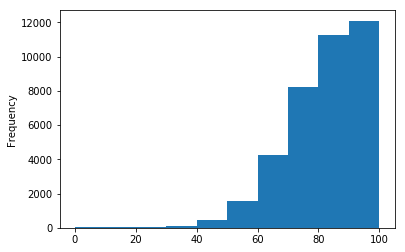

In [14]:
%matplotlib inline
data_per['AFGR'].plot(x='AFGR', kind='hist')

In [15]:
data_per['AFGR'].describe()

count    37994.000000
mean        82.238651
std         13.342433
min          0.000000
25%         74.200000
50%         83.800000
75%         92.400000
max        100.000000
Name: AFGR, dtype: float64

# Connect to Spark

In [16]:
from __future__ import division
from pyspark.sql import SparkSession
from pyspark.ml import feature, regression, evaluation, Pipeline, classification
from pyspark.sql import functions as fn, Row
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
from pyspark.ml import PipelineModel

# Split data

In [17]:
from sklearn.model_selection import train_test_split

### Stratified Shuffle Split

In [18]:
training_df, testing_df = train_test_split(data_per, test_size=0.1, train_size=0.9, random_state=30, stratify=data_per['SCHLEV'])

In [19]:
training_df, validation_df = train_test_split(training_df, test_size=0.34, train_size=0.66, random_state=30, stratify=training_df['SCHLEV'])

In [20]:
training_df['SCHLEV'].value_counts()/len(training_df)

3     0.740606
03    0.250709
2     0.005583
02    0.001684
1     0.000842
5     0.000399
05    0.000133
01    0.000044
Name: SCHLEV, dtype: float64

##### no need to care the difference between "3" and "03", in the process of create change_dummy(dummy_df) function, it will accept both.

In [21]:
# compare with whole dataset percentage

In [22]:
data_per['SCHLEV'].value_counts()/len(data_per)

3     0.740643
03    0.250724
2     0.005580
02    0.001684
1     0.000816
5     0.000395
05    0.000105
01    0.000053
Name: SCHLEV, dtype: float64

# Correlation

In [23]:
# Load the data
edu_df = spark.createDataFrame(data)
edu_per_df = spark.createDataFrame(data_per)

### Correlation between variables and AFGR

In [24]:
edu_columns = ['SCHLEV', 'AGCHRT', 'CONUM', 'FIPST', 'YEAR',
       'V33', 'Re_F_Basic', 'Re_F_Special', 'Re_F_Other', 'Re_S_Basic',
       'Re_S_Special', 'Re_S_Other', 'Re_L_Gov', 'Re_L_fee', 'Re_L_Other',
       'Ex_Teacher_Inst', 'Ex_Teacher_Supp', 'Ex_Employ', 'Ex_Edu',
       'Ex_Community', 'Ex_Capital', 'Ex_Payment', 'Ex_Textbook','Ex_Interest']

edu_corr_df = edu_df.select(([fn.corr(a,'AFGR').alias('corr_'+a+'_AFGR') for a in edu_columns]))
edu_corr_df.show()

+--------------------+-------------------+-------------------+------------------+------------------+--------------------+--------------------+----------------------+--------------------+--------------------+----------------------+--------------------+--------------------+-------------------+--------------------+-------------------------+-------------------------+--------------------+--------------------+----------------------+--------------------+--------------------+---------------------+---------------------+
|    corr_SCHLEV_AFGR|   corr_AGCHRT_AFGR|    corr_CONUM_AFGR|   corr_FIPST_AFGR|    corr_YEAR_AFGR|       corr_V33_AFGR|corr_Re_F_Basic_AFGR|corr_Re_F_Special_AFGR|corr_Re_F_Other_AFGR|corr_Re_S_Basic_AFGR|corr_Re_S_Special_AFGR|corr_Re_S_Other_AFGR|  corr_Re_L_Gov_AFGR| corr_Re_L_fee_AFGR|corr_Re_L_Other_AFGR|corr_Ex_Teacher_Inst_AFGR|corr_Ex_Teacher_Supp_AFGR| corr_Ex_Employ_AFGR|    corr_Ex_Edu_AFGR|corr_Ex_Community_AFGR|corr_Ex_Capital_AFGR|corr_Ex_Payment_AFGR|corr_Ex_Tex

### Correlation between percentage variables and AFGR

In [25]:
edu_per_columns = edu_per_df.columns
edu_per_corr_df = edu_per_df.select(([fn.corr(a,'AFGR').alias(a+'_AFGR') for a in edu_per_columns]))
edu_per_corr_df.show()

+-------------------+--------------------+-------------------+-------------------+------------------+------------------+--------------------+-------------------+---------------------+--------------------+-------------------+---------------------+--------------------+-------------------+-------------------+--------------------+------------------------+------------------------+--------------------+--------------------+---------------------+--------------------+-------------------+--------------------+--------------------+---------+
|         LEAID_AFGR|         SCHLEV_AFGR|        AGCHRT_AFGR|         CONUM_AFGR|        FIPST_AFGR|         YEAR_AFGR|            V33_AFGR|Re_F_Basic_Per_AFGR|Re_F_Special_Per_AFGR| Re_F_Other_Per_AFGR|Re_S_Basic_Per_AFGR|Re_S_Special_Per_AFGR| Re_S_Other_Per_AFGR|  Re_L_Gov_Per_AFGR|  Re_L_fee_Per_AFGR| Re_L_Other_Per_AFGR|Ex_Teacher_Inst_Per_AFGR|Ex_Teacher_Supp_Per_AFGR|  Ex_Employ_Per_AFGR|     Ex_Edu_Per_AFGR|Ex_Community_Per_AFGR| Ex_Capital_Per_AFGR|E

# 3. Create dummy variables (feature engineering)
---

Create dummy variable for:
- SCHLEV: School level
- YEAR: Year of the data
- AGCHRT: Label for charter school or public school

Bucket target variable for classification

In [26]:
data['SCHLEV'].value_counts()

3     28140
03     9526
2       212
02       64
1        31
5        15
05        4
01        2
Name: SCHLEV, dtype: int64

In [27]:
data['AGCHRT'].value_counts()

3    35955
2     1927
1      112
Name: AGCHRT, dtype: int64

In [28]:
def change_dummy(dummy_df):
    dummy_df = dummy_df.withColumn('SCHLEV_2',fn.when(fn.col('SCHLEV') == 2,1).otherwise(0)).\
                    withColumn('SCHLEV_3',fn.when(fn.col('SCHLEV') == 3,1).otherwise(0)).\
                    withColumn('SCHLEV_5',fn.when(fn.col('SCHLEV') == 5,1).otherwise(0))
    for i in [8,9,10]:
        dummy_df = dummy_df.withColumn('YEAR'+str(i),fn.when(fn.col('YEAR') == i, 1).otherwise(0))
    for i in [2,3]:
        dummy_df = dummy_df.withColumn('AGCHRT'+str(i),fn.when(fn.col('AGCHRT') == i, 1).otherwise(0))
    dummy_df = dummy_df.drop('SCHLEV').drop('YEAR').drop('AGCHRT')
    return dummy_df

In [29]:
training_df = change_dummy(spark.createDataFrame(training_df))

In [30]:
validation_df = change_dummy(spark.createDataFrame(validation_df))

In [31]:
testing_df = change_dummy(spark.createDataFrame(testing_df))

In [32]:
print("# points in training: ", training_df.count())
print("# points in validation: ", validation_df.count())
print("# points in testing: ", testing_df.count())

# points in training:  22568
# points in validation:  11626
# points in testing:  3800


# 4. Compare models
---

##### Try 3 types of varibale combination

In [33]:
features1 = ['V33','Re_F_Basic_Per', 'Re_F_Special_Per', 'Re_F_Other_Per', 'Re_S_Basic_Per', 'Re_S_Special_Per',
            'Re_S_Other_Per', 'Re_L_Gov_Per', 'Re_L_fee_Per', 'Re_L_Other_Per', 'Ex_Teacher_Inst_Per', 
            'Ex_Teacher_Supp_Per', 'Ex_Employ_Per', 'Ex_Edu_Per', 'Ex_Community_Per', 'Ex_Capital_Per', 
            'Ex_Payment_Per', 'Ex_Textbook_Per', 'Ex_Interest_Per','SCHLEV_2', 'SCHLEV_3', "SCHLEV_5", 'YEAR8', 
            'YEAR9', 'YEAR10', 'AGCHRT2', 'AGCHRT3']
features2 = ['Re_F_Basic_Per', 'Re_F_Special_Per', 'Re_S_Basic_Per', 'Re_S_Special_Per',
            'Re_L_Gov_Per', 'Re_L_fee_Per', 'Ex_Teacher_Inst_Per', 
            'Ex_Teacher_Supp_Per', 'Ex_Employ_Per', 'Ex_Edu_Per', 'Ex_Community_Per', 'Ex_Capital_Per']
features3 = ['V33','Re_F_Basic_Per', 'Re_F_Special_Per', 'Re_F_Other_Per', 'Re_S_Basic_Per',
            'Re_S_Other_Per', 'Re_L_Gov_Per', 'Re_L_fee_Per', 
            'Ex_Teacher_Supp_Per', 'Ex_Edu_Per','Ex_Payment_Per', 
            'Ex_Textbook_Per', 'Ex_Interest_Per',
            'AGCHRT2', 'AGCHRT3']

In [34]:
vectorizer = feature.VectorAssembler(inputCols=features1,outputCol='features')

##### Create buckets for AFGR (Graduation rate)

In [35]:
data_per['AFGR'].median()

83.8

In [36]:
split = [-float("inf"), 83.8, float("inf")]

In [37]:
bucketizer = feature.Bucketizer(splits = split,inputCol='AFGR',outputCol='AFGR_B')

In [38]:
# AUC evaluator
evaluator = evaluation.BinaryClassificationEvaluator(labelCol='AFGR_B')

### Model 1: Logistic Regression

In [39]:
lr = classification.LogisticRegression(regParam=0.02,elasticNetParam=0.2,featuresCol='features',labelCol='AFGR_B')

In [40]:
lr_estimator = Pipeline(stages=[vectorizer, bucketizer, lr])

In [41]:
lr_pipe = lr_estimator.fit(training_df)

In [42]:
lr_pipe

PipelineModel_6615badba97d

In [43]:
print('Model 1 AUC: ', evaluator.evaluate(lr_pipe.transform(validation_df)))

Model 1 AUC:  0.7604715738390542


##### Grid Search

In [44]:
from pyspark.ml.tuning import ParamGridBuilder

In [45]:
lr_estimator.getStages()

[VectorAssembler_3e54733ee592,
 Bucketizer_11aa9b6ed0e1,
 LogisticRegression_0a5fdfb933ff]

In [46]:
grid = ParamGridBuilder().\
    addGrid(vectorizer.inputCols, [features1, features2, features3]).\
    addGrid(lr.regParam, [0., 0.01, 0.02]).\
    addGrid(lr.elasticNetParam, [0., 0.2, 0.4]).\
    build()

In [16]:
#grid

All models are saved in `"models/lr/"` directory, for future using purpose.

In [48]:
all_models = []
for j in range(len(grid)):
    print("Fitting model {}".format(j+1))
    model = lr_estimator.fit(training_df, grid[j])
    model.save("temp/models/lr/model_{}".format(j+1))
    all_models.append(model)

Fitting model 1
Fitting model 2
Fitting model 3
Fitting model 4
Fitting model 5
Fitting model 6
Fitting model 7
Fitting model 8
Fitting model 9
Fitting model 10
Fitting model 11
Fitting model 12
Fitting model 13
Fitting model 14
Fitting model 15
Fitting model 16
Fitting model 17
Fitting model 18
Fitting model 19
Fitting model 20
Fitting model 21
Fitting model 22
Fitting model 23
Fitting model 24
Fitting model 25
Fitting model 26
Fitting model 27


In [17]:
#all_models

In [50]:
accuracies = [evaluator.evaluate(m.transform(validation_df)) for m in all_models]

In [18]:
#accuracies

In [52]:
best_model_idx = np.argmax(accuracies)

In [53]:
best_model_idx

0

In [54]:
grid[best_model_idx]

{Param(parent='VectorAssembler_3e54733ee592', name='inputCols', doc='input column names.'): ['V33',
  'Re_F_Basic_Per',
  'Re_F_Special_Per',
  'Re_F_Other_Per',
  'Re_S_Basic_Per',
  'Re_S_Special_Per',
  'Re_S_Other_Per',
  'Re_L_Gov_Per',
  'Re_L_fee_Per',
  'Re_L_Other_Per',
  'Ex_Teacher_Inst_Per',
  'Ex_Teacher_Supp_Per',
  'Ex_Employ_Per',
  'Ex_Edu_Per',
  'Ex_Community_Per',
  'Ex_Capital_Per',
  'Ex_Payment_Per',
  'Ex_Textbook_Per',
  'Ex_Interest_Per',
  'SCHLEV_2',
  'SCHLEV_3',
  'SCHLEV_5',
  'YEAR8',
  'YEAR9',
  'YEAR10',
  'AGCHRT2',
  'AGCHRT3'],
 Param(parent='LogisticRegression_0a5fdfb933ff', name='regParam', doc='regularization parameter (>= 0).'): 0.0,
 Param(parent='LogisticRegression_0a5fdfb933ff', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0}

In [55]:
best_model = all_models[best_model_idx]

The best model of Logistic Regression is saved in `"models/best_models/"` directory, for future using purpose.

In [56]:
best_model.save("temp/models/best_models/lr_best_model")

In [57]:
accuracies[best_model_idx]

0.7636044852623628

### estimate generalization performance

In [58]:
evaluator.evaluate(best_model.transform(testing_df))

0.7565706996953316

In [59]:
# Or load this model from "models/best_models/lr_best_model"
# Be sure to execute "from pyspark.ml import PipelineModel" first

In [60]:
lr_best_model = PipelineModel.load("models/best_models/lr_best_model")

In [61]:
evaluator.evaluate(lr_best_model.transform(testing_df))

0.7565706996953321

### Model 2: Random Forest

In [62]:
from pyspark.ml.classification import RandomForestClassifier

In [63]:
rf = RandomForestClassifier(featuresCol='features',labelCol='AFGR_B')

In [64]:
rf_estimator = Pipeline(stages=[vectorizer, bucketizer, rf])

In [65]:
rf_pipe = rf_estimator.fit(training_df)

In [66]:
print('Model 1 AUC: ', evaluator.evaluate(rf_pipe.transform(validation_df)))

Model 1 AUC:  0.7712679907358586


##### Grid Search

In [49]:
from pyspark.ml.tuning import ParamGridBuilder

In [50]:
rf_estimator.getStages()

[VectorAssembler_df78fd638ee7,
 Bucketizer_938fc4fa1903,
 RandomForestClassifier_e0740f254628]

In [51]:
grid = ParamGridBuilder().\
    addGrid(vectorizer.inputCols, [features1, features2, features3]).\
    addGrid(rf.numTrees, [10, 20, 40]).\
    addGrid(rf.maxDepth, [3, 5, 10]).\
    addGrid(rf.maxBins, [16, 32, 64]).\
    build()

In [19]:
#grid

All models are saved in `"models/rf/"` directory, for future using purpose.

In [20]:
#all_models = []
#for j in range(len(grid)):
#    print("Fitting model {}".format(j+1))
#    model = rf_estimator.fit(training_df, grid[j])
#    model.save("temp/models/rf/model_{}".format(j+1))
#    all_models.append(model)

In [21]:
#all_models

In [55]:
accuracies = [evaluator.evaluate(m.transform(validation_df)) for m in all_models]

In [22]:
#accuracies

In [57]:
best_model_idx = np.argmax(accuracies)

In [58]:
best_model_idx

26

In [59]:
grid[best_model_idx]

{Param(parent='VectorAssembler_df78fd638ee7', name='inputCols', doc='input column names.'): ['V33',
  'Re_F_Basic_Per',
  'Re_F_Special_Per',
  'Re_F_Other_Per',
  'Re_S_Basic_Per',
  'Re_S_Special_Per',
  'Re_S_Other_Per',
  'Re_L_Gov_Per',
  'Re_L_fee_Per',
  'Re_L_Other_Per',
  'Ex_Teacher_Inst_Per',
  'Ex_Teacher_Supp_Per',
  'Ex_Employ_Per',
  'Ex_Edu_Per',
  'Ex_Community_Per',
  'Ex_Capital_Per',
  'Ex_Payment_Per',
  'Ex_Textbook_Per',
  'Ex_Interest_Per',
  'SCHLEV_2',
  'SCHLEV_3',
  'SCHLEV_5',
  'YEAR8',
  'YEAR9',
  'YEAR10',
  'AGCHRT2',
  'AGCHRT3'],
 Param(parent='RandomForestClassifier_e0740f254628', name='numTrees', doc='Number of trees to train (>= 1).'): 40,
 Param(parent='RandomForestClassifier_e0740f254628', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes.'): 10,
 Param(parent='RandomForestClassifier_e0740f254628', name='maxBins', doc='Max number of bins for discretizing continuo

In [60]:
best_model = all_models[best_model_idx]

The best model of Random Forest is saved in `"models/best_models/"` directory, for future using purpose.

In [61]:
best_model.save("temp/models/best_models/rf_best_model")

In [62]:
accuracies[best_model_idx]

0.8074818176816858

### estimate generalization performance

In [63]:
evaluator.evaluate(best_model.transform(testing_df))

0.8066633587027044

In [64]:
# Or load this model from "models/best_models/rf_best_model"
# Be sure to execute "from pyspark.ml import PipelineModel" first

In [67]:
rf_best_model = PipelineModel.load("models/best_models/rf_best_model")

In [68]:
evaluator.evaluate(rf_best_model.transform(testing_df))

0.8066633587027041

### Model 3: Gradient-Boosted Trees

In [69]:
from pyspark.ml.classification import GBTClassifier

In [70]:
gbt = GBTClassifier(featuresCol='features',labelCol='AFGR_B')
gbt_estimator = Pipeline(stages=[vectorizer, bucketizer, gbt])
gbt_pipe = gbt_estimator.fit(training_df)
print('Model 1 AUC: ', evaluator.evaluate(gbt_pipe.transform(validation_df)))

Model 1 AUC:  0.7922094367740616


In [69]:
from pyspark.ml.tuning import ParamGridBuilder

In [70]:
gbt_estimator.getStages()

[VectorAssembler_df78fd638ee7,
 Bucketizer_938fc4fa1903,
 GBTClassifier_37b6db02d376]

In [71]:
grid = ParamGridBuilder().\
    addGrid(vectorizer.inputCols, [features1, features2, features3]).\
    addGrid(gbt.maxIter, [5, 10, 20, 40]).\
    addGrid(gbt.maxDepth, [3, 5, 10]).\
    addGrid(gbt.maxBins, [16, 32, 64]).\
    build()

In [72]:
len(grid)

108

All models are saved in `"models/gbt/"` directory, for future using purpose.

In [23]:
#all_models = []
#for j in range(len(grid)):
#    print("Fitting model {}".format(j+1))
#    model = gbt_estimator.fit(training_df, grid[j])
#    model.save("temp/models/gbt/model_{}".format(j+1))
#    all_models.append(model)

In [24]:
#all_models

In [75]:
accuracies = [evaluator.evaluate(m.transform(validation_df)) for m in all_models]

In [25]:
#accuracies

In [77]:
best_model_idx = np.argmax(accuracies)

In [78]:
best_model_idx

31

In [79]:
grid[best_model_idx]

{Param(parent='VectorAssembler_df78fd638ee7', name='inputCols', doc='input column names.'): ['V33',
  'Re_F_Basic_Per',
  'Re_F_Special_Per',
  'Re_F_Other_Per',
  'Re_S_Basic_Per',
  'Re_S_Special_Per',
  'Re_S_Other_Per',
  'Re_L_Gov_Per',
  'Re_L_fee_Per',
  'Re_L_Other_Per',
  'Ex_Teacher_Inst_Per',
  'Ex_Teacher_Supp_Per',
  'Ex_Employ_Per',
  'Ex_Edu_Per',
  'Ex_Community_Per',
  'Ex_Capital_Per',
  'Ex_Payment_Per',
  'Ex_Textbook_Per',
  'Ex_Interest_Per',
  'SCHLEV_2',
  'SCHLEV_3',
  'SCHLEV_5',
  'YEAR8',
  'YEAR9',
  'YEAR10',
  'AGCHRT2',
  'AGCHRT3'],
 Param(parent='GBTClassifier_37b6db02d376', name='maxIter', doc='max number of iterations (>= 0).'): 40,
 Param(parent='GBTClassifier_37b6db02d376', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes.'): 5,
 Param(parent='GBTClassifier_37b6db02d376', name='maxBins', doc='Max number of bins for discretizing continuous features.  Must be >=2 and

In [80]:
best_model = all_models[best_model_idx]

The best model of Gradient-Boosted Trees is saved in `"models/best_models/"` directory, for future using purpose.

In [81]:
best_model.save("temp/models/best_models/gbt_best_model")

In [82]:
accuracies[best_model_idx]

0.8004309321675198

### estimate generalization performance

In [83]:
evaluator.evaluate(best_model.transform(testing_df))

0.799946307921576

In [84]:
# Or load this model from "models/best_models/gbt_best_model"
# Be sure to execute "from pyspark.ml import PipelineModel" first

In [71]:
gbt_best_model = PipelineModel.load("models/best_models/gbt_best_model")

In [72]:
evaluator.evaluate(gbt_best_model.transform(testing_df))

0.7999463079215745

# 5. Inference with models
---

logistic regression

In [73]:
lr_best_model = PipelineModel.load("models/best_models/lr_best_model")

In [74]:
weights = lr_best_model.stages[-1].coefficients.toArray()

All these best models are using the feature1 combination.

In [75]:
vwdf = pd.DataFrame({'features': features1,'weight': weights})

In [76]:
positive_fis = vwdf.sort_values(by = 'weight',ascending = False).head(20)
negative_fis = vwdf.sort_values(by = 'weight').head(20)

In [77]:
positive_fis.head()

,features,weight
8,Re_L_fee_Per,13.477682
10,Ex_Teacher_Inst_Per,1.832259
14,Ex_Community_Per,1.370589
13,Ex_Edu_Per,1.150229
25,AGCHRT2,0.837651


In [78]:
negative_fis.head()

,features,weight
17,Ex_Textbook_Per,-26.100121
1,Re_F_Basic_Per,-25.849196
11,Ex_Teacher_Supp_Per,-7.136946
3,Re_F_Other_Per,-6.375287
6,Re_S_Other_Per,-2.586610


Random Forest

In [79]:
rf_best_model = PipelineModel.load("models/best_models/rf_best_model")

In [80]:
pd.DataFrame(list(zip(features1, rf_best_model.stages[-1].featureImportances.toArray())),
            columns = ['features', 'weight']).sort_values(by = 'weight',ascending = False)

,features,weight
1,Re_F_Basic_Per,0.209695
0,V33,0.100442
7,Re_L_Gov_Per,0.083649
16,Ex_Payment_Per,0.080412
8,Re_L_fee_Per,0.074972
4,Re_S_Basic_Per,0.043256
6,Re_S_Other_Per,0.042239
11,Ex_Teacher_Supp_Per,0.038977
5,Re_S_Special_Per,0.038703
3,Re_F_Other_Per,0.032448


Gradient-Boosted Trees

In [81]:
gbt_best_model = PipelineModel.load("models/best_models/gbt_best_model")

In [82]:
pd.DataFrame(list(zip(features1, gbt_best_model.stages[-1].featureImportances.toArray())),
            columns = ['features', 'weight']).sort_values(by = 'weight',ascending = False)

,features,weight
1,Re_F_Basic_Per,0.112664
0,V33,0.101049
5,Re_S_Special_Per,0.071157
10,Ex_Teacher_Inst_Per,0.059757
8,Re_L_fee_Per,0.053880
11,Ex_Teacher_Supp_Per,0.053214
15,Ex_Capital_Per,0.048459
3,Re_F_Other_Per,0.047108
12,Ex_Employ_Per,0.045055
17,Ex_Textbook_Per,0.044471


# 6. Clustering

In [83]:
data_fiscal = pd.read_csv('data/data_per.csv', index_col = 0)

In [84]:
data_poverty = pd.read_csv('data/NY_School_Poverty.csv')

In [85]:
data_fiscal.head()

,LEAID,SCHLEV,AGCHRT,CONUM,FIPST,YEAR,V33,Re_F_Basic_Per,Re_F_Special_Per,Re_F_Other_Per,...,Ex_Teacher_Inst_Per,Ex_Teacher_Supp_Per,Ex_Employ_Per,Ex_Edu_Per,Ex_Community_Per,Ex_Capital_Per,Ex_Payment_Per,Ex_Textbook_Per,Ex_Interest_Per,AFGR
0,100005,3,3,1095,1,7,3747,0.073893,0.028174,0.006413,...,0.347287,0.159720,0.200778,0.872254,0.021524,0.074071,0.001336,0.0,0.003384,73.0
1,100006,3,3,1095,1,7,5562,0.092814,0.022599,0.004567,...,0.316362,0.186722,0.202178,0.872917,0.028356,0.018579,0.000117,0.0,0.017466,47.4
2,100007,3,3,1073,1,7,12039,0.009402,0.013543,0.001118,...,0.306802,0.165916,0.189251,0.871486,0.024811,0.123803,0.000443,0.0,0.064098,88.7
3,100008,3,3,1089,1,7,8056,0.018015,0.021443,0.000622,...,0.327924,0.142717,0.184968,0.853974,0.015500,0.049955,0.001708,0.0,0.042781,97.6
4,100011,3,3,1073,1,7,1395,0.033507,0.013334,0.000000,...,0.165087,0.089746,0.100825,0.450294,0.002980,0.101971,0.000306,0.0,0.007450,61.9


In [86]:
data_poverty.head()

,School District,Unnamed: 1,Unnamed: 2,LEAID,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,PovertyRate,Unnamed: 21
0,Addison Central School District,NY,NaN,3602370,"7,219",6.57,19.30,14.05,38.6,96.54,...,1.29,0.00,0.87,81.1,9.0,1.63,"40,086","50,200",19.4,"66,600"
1,Adirondack Central School District,NY,NaN,3605040,"8,850",4.77,18.05,16.77,41.7,97.76,...,0.42,0.00,0.99,84.5,11.1,0.85,"44,750","53,601",12.7,"95,500"
2,Afton Central School District,NY,NaN,3602400,"4,342",8.36,12.64,17.04,43.7,98.09,...,0.00,0.00,4.77,87.7,16.0,4.55,"43,910","52,652",15.6,"91,700"
3,Akron Central School District,NY,NaN,3602430,"9,522",5.94,19.23,12.95,39.6,91.07,...,0.72,0.00,1.32,88.7,22.2,1.53,"55,419","63,264",10.4,"129,200"
4,Albany City School District,NY,NaN,3602460,"93,878",5.39,13.47,12.27,30.0,60.50,...,3.78,0.09,6.55,87.2,36.4,4.56,"38,642","49,381",25.2,"165,200"


In [87]:
data_poverty = data_poverty[['School District','LEAID','PovertyRate']]

In [88]:
data_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 3 columns):
School District    688 non-null object
LEAID              688 non-null int64
PovertyRate        688 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 16.2+ KB


In [89]:
data_poverty['PovertyRate'].describe()

count    688.000000
mean       9.890116
std        6.198085
min        0.000000
25%        5.275000
50%        8.900000
75%       13.300000
max       71.300000
Name: PovertyRate, dtype: float64

In [90]:
poverty_df = spark.createDataFrame(data_poverty)

### Running k-means cluster

In [91]:
edu_df = spark.createDataFrame(data_fiscal)
edu_df = edu_df.where(edu_df.YEAR == '10')
edu_df = edu_df.where(edu_df.FIPST == '36')

In [92]:
print(edu_df.columns)

['LEAID', 'SCHLEV', 'AGCHRT', 'CONUM', 'FIPST', 'YEAR', 'V33', 'Re_F_Basic_Per', 'Re_F_Special_Per', 'Re_F_Other_Per', 'Re_S_Basic_Per', 'Re_S_Special_Per', 'Re_S_Other_Per', 'Re_L_Gov_Per', 'Re_L_fee_Per', 'Re_L_Other_Per', 'Ex_Teacher_Inst_Per', 'Ex_Teacher_Supp_Per', 'Ex_Employ_Per', 'Ex_Edu_Per', 'Ex_Community_Per', 'Ex_Capital_Per', 'Ex_Payment_Per', 'Ex_Textbook_Per', 'Ex_Interest_Per', 'AFGR']


In [93]:
from pyspark.ml import clustering

In [94]:
pipe_cluster = \
    Pipeline(stages=[
        feature.VectorAssembler(inputCols=['SCHLEV', 'AGCHRT', 'CONUM', 'FIPST', 'YEAR', 'V33', 'Re_F_Basic_Per', 'Re_F_Special_Per', 'Re_F_Other_Per', 'Re_S_Basic_Per', 'Re_S_Special_Per', 'Re_S_Other_Per', 'Re_L_Gov_Per', 'Re_L_fee_Per', 'Re_L_Other_Per', 'Ex_Teacher_Inst_Per', 'Ex_Teacher_Supp_Per', 'Ex_Employ_Per', 'Ex_Edu_Per', 'Ex_Community_Per', 'Ex_Capital_Per', 'Ex_Payment_Per', 'Ex_Textbook_Per', 'Ex_Interest_Per'],outputCol='features'),
        clustering.KMeans(k=3,seed=0,featuresCol='features', predictionCol='prediction')]).\
    fit(edu_df)

edu_clustered_df = pipe_cluster.transform(edu_df)

In [95]:
edu_clustered_df

DataFrame[LEAID: bigint, SCHLEV: bigint, AGCHRT: bigint, CONUM: bigint, FIPST: bigint, YEAR: bigint, V33: bigint, Re_F_Basic_Per: double, Re_F_Special_Per: double, Re_F_Other_Per: double, Re_S_Basic_Per: double, Re_S_Special_Per: double, Re_S_Other_Per: double, Re_L_Gov_Per: double, Re_L_fee_Per: double, Re_L_Other_Per: double, Ex_Teacher_Inst_Per: double, Ex_Teacher_Supp_Per: double, Ex_Employ_Per: double, Ex_Edu_Per: double, Ex_Community_Per: double, Ex_Capital_Per: double, Ex_Payment_Per: double, Ex_Textbook_Per: double, Ex_Interest_Per: double, AFGR: double, features: vector, prediction: int]

### See if poor / rich districts are in the same cluster

In [96]:
cluster = edu_clustered_df.select(['LEAID','prediction']).toPandas()
merged = pd.merge(cluster,data_poverty,on='LEAID')
merged['prediction'].value_counts()

0    433
1    154
2     47
Name: prediction, dtype: int64

In [97]:
len(merged)

634

In [98]:
poor_cluster = merged[merged['PovertyRate'] > 13.3][['School District','prediction']].groupby('prediction').count()
midd_cluster = merged[(5.275 <= merged['PovertyRate']) & (merged['PovertyRate'] <= 13.3)][['School District','prediction']].groupby('prediction').count()
rich_cluster = merged[merged['PovertyRate'] < 5.275][['School District','prediction']].groupby('prediction').count()
alls_cluster = merged[['School District','prediction']].groupby('prediction').count()

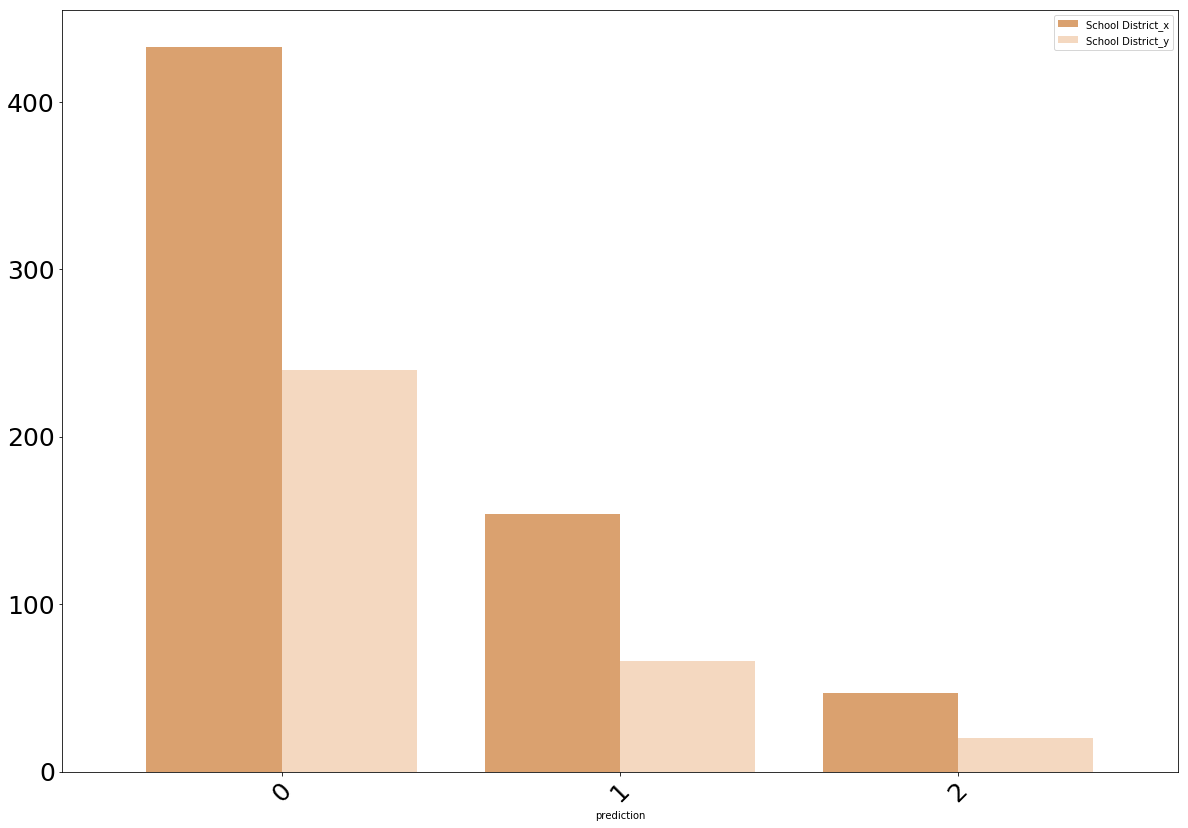

In [99]:
cluster1 = pd.merge(alls_cluster,midd_cluster,on='prediction')
cluster1.plot(kind='bar',color=['#daa16f','#f4d8c0'],rot=45,width=0.8,figsize=(20,14),fontsize=25)

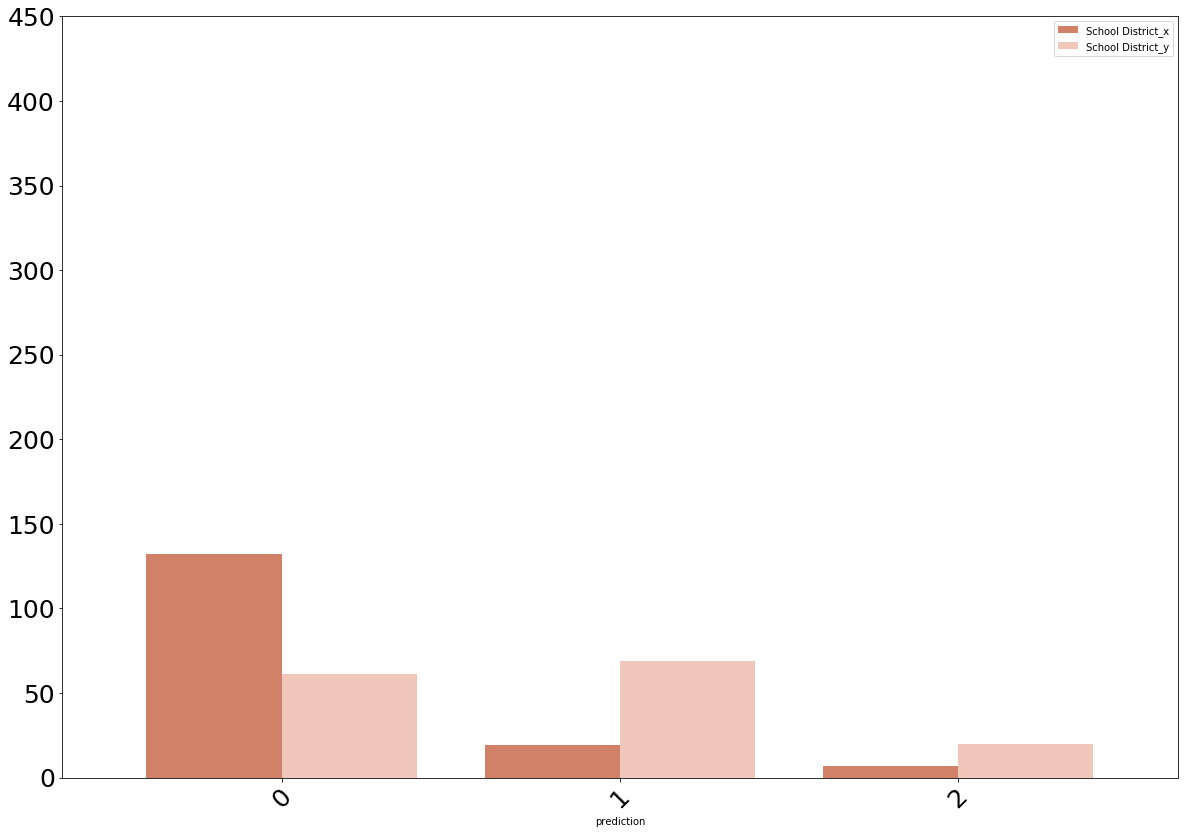

In [100]:
cluster2 = pd.merge(poor_cluster,rich_cluster,on='prediction')
cluster2.plot(kind='bar',color=['#d18167','#f1c7bb'],rot=45,width=0.8,figsize=(20,14),fontsize=25,ylim=[0,450])